<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" /> 
    
    
### <font color='navy'> Simulación matemática. 

**Nombres:** Santiago Reyes, Juan Pablo Barba

**Fecha:** 20 de septiembre

**Expediente** : 745826, 747297
    
**Profesor:** Oscar David Jaramillo Zuluaga.
   
# PROYECTO MÓDULO 1: OPTIMIZACIÓN Y AJUSTE DE CURVAS

## Objetivo General del Proyecto
   El objetivo general del proyecto es aplicar las herramientas de optimización, programación lineal, y ajuste de curvas, a un problema real con soluciones prácticas en el mundo real y de preferencia relacionados a nuestro campo de estudio. En este caso, elegimos problemas que se relacionaran al campo de las finanzas, el cual es característico por ser un buen ejemplo de un área de estudios en la que sobresalen elementos como el modelado matemático y la simulación.
   
   
   En el caso del proyecto de ajuste de curvas, se busca más puntualmente generar un modelo que pueda predecir el comportamiento del problema en cuestión. Mientras que el problema de Programación Lineal se enfoca más en maximizar un rendimiento a partir de unas condiciones específicas. 


## 1. Ajuste de curva de Intereses Pagados por el Gobierno

### 1.2 Objetivos.
> Identificar la tendencia principal de la grafica de los intereses.

> Identificar como cada año incrementan los intereses de la deuda gubernamental

> Poder ajustar una curva que optimize los datos que nos dan en la grafica y minimizar el error


### 1.3 Introducción

>En este problema realizaremos un análisis sobre una gráfica de los intereses de la deuda gubernamental, después se realizará una optimización y ajustaremos una curva que minimize el error de esta gráfica y así poder predecir la tendencia a futuro

### Pagos de intereses (en moneda local actual) - México

Los pagos de intereses abarcan los pagos de intereses sobre la deuda gubernamental, que incluye bonos a largo plazo, préstamos a largo plazo y otros instrumentos de deuda, tanto a residentes nacionales como extranjeros. Esta información se presenta anualmente. El método de contabilidad recomendado por el FMI se basa en la acumulación, teniendo en cuenta todos los eventos económicos que afectan a activos, pasivos, ingresos y gastos, no solo las transacciones en efectivo. Esto implica contabilizar todos los cambios en los inventarios, lo que significa que los datos de inventarios al final de un período contable son iguales a los datos al principio, más los flujos durante el período. En contraste, el manual de 1986 solo consideraba los inventarios de deuda. Los datos de finanzas del gobierno se informan en moneda local y muchos países lo hacen en base al año fiscal, cuyos detalles específicos se encuentran en los metadatos del país.

### 1.4 Modelo que representa el problema.

> - Se debe incluir la función a optimizar y las restricciones (en caso de que existan).
> - Deducción del modelo. Explicación detallada de las ecuaciones de acuerdo al problema que se quiera resolver o modelo que se quiera representar.
> - ¿Qué situación representa el modelo? ¿Cuáles son las limitaciones fundamentales?
> - Significado y valor de los parámetros (constantes que aparezcan en el modelo).

### 1.5 Solución del problema de optimización.

In [2]:
# Cargar librerias que se usarán
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

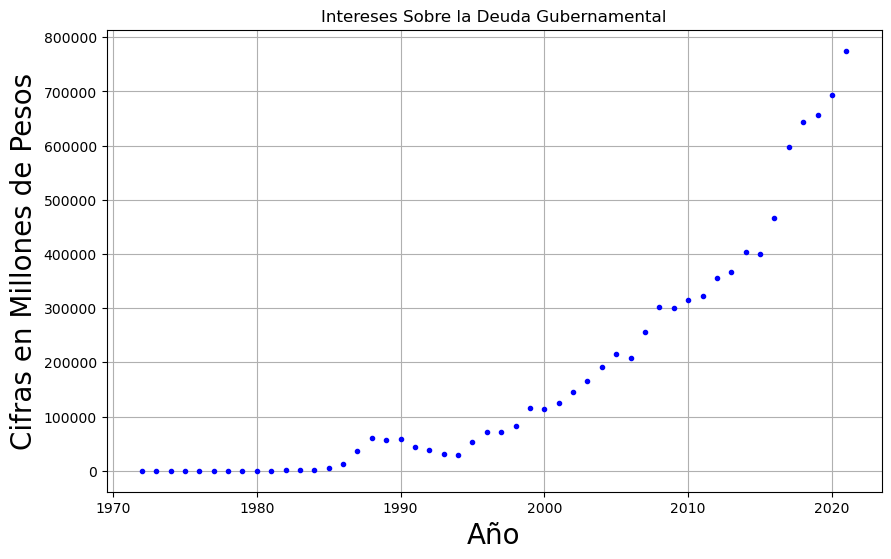

In [3]:
# Datos proporcionados
x = np.arange(1972, 2022)
y = np.array([5,7,11,14,20,32,41,53,75,169,417,1603,2259,4364,11591,35559,61117,57396,59466,43244,37943,30421,28490,53008,72287,70709,82917,115894,113161,125596,145674,165418,192145,215967,208698,255967,302999,300526,314151,322243,355665,367399,402738,400293,465695,597090,642805,655783,693873,775108])

# Graficamos los datos
plt.figure(figsize =(10,6))
plt.plot(x,y,'.b')

plt.title('Intereses Sobre la Deuda Gubernamental')
plt.xlabel('Año',fontsize = 20)
plt.ylabel('Cifras en Millones de Pesos',fontsize = 20)

plt.grid()
plt.show()


In [4]:
#Preprocesamiento de los datos
min_x1, min_y1 = min(x), min(y)
max_x1, max_y1 = max(x), max(y)

x_norm = (x - max_x1)/(max_x1 - min_x1)
y_norm = (y - min_y1)/(max_y1 - min_y1)

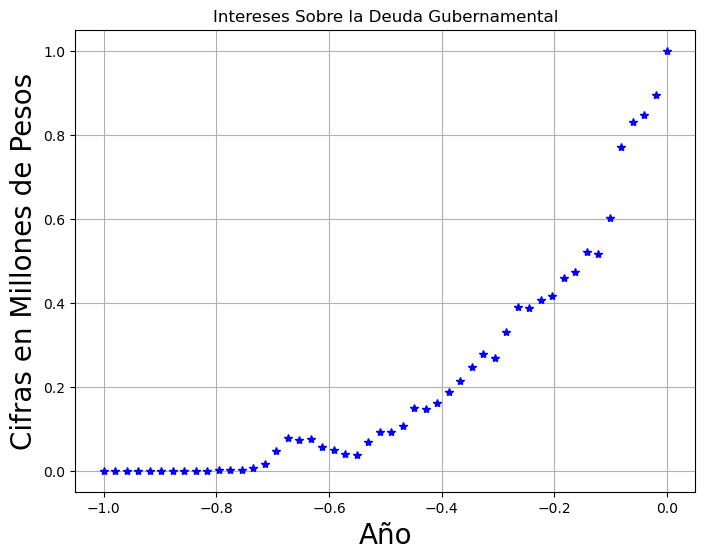

In [5]:
# Graficamos los datos normalizados
plt.figure(figsize =(8,6))
plt.plot(x_norm,y_norm,'*b')

plt.title('Intereses Sobre la Deuda Gubernamental')
plt.xlabel('Año',fontsize = 20)
plt.ylabel('Cifras en Millones de Pesos',fontsize = 20)

plt.grid()
plt.show()

In [18]:
# Definir funcion objetivo y semilla
def obj_n(beta, x, y, n):
    yhat = beta.dot([x**i for i in range(n)])
    error = y-yhat
    return np.sum(error**2)
n = 4
beta_inicial = np.zeros(n)

In [19]:
# Resolver
sol3 = opt.minimize(obj_n, beta_inicial, args=(x_norm,y_norm, n))
sol3

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.04192736911322362
        x: [ 9.625e-01  3.306e+00  3.968e+00  1.642e+00]
      nit: 12
      jac: [ 2.934e-07  4.247e-07 -2.136e-06  3.305e-06]
 hess_inv: [[ 1.376e-01  1.024e+00  2.029e+00  1.171e+00]
            [ 1.024e+00  1.054e+01  2.376e+01  1.471e+01]
            [ 2.029e+00  2.376e+01  5.729e+01  3.700e+01]
            [ 1.171e+00  1.471e+01  3.700e+01  2.460e+01]]
     nfev: 75
     njev: 15

In [20]:
# Mostrar coeficientes
beta3 = sol3.x
beta3

array([0.96248484, 3.30623753, 3.96848294, 1.6422398 ])

### 1.6 Visualización de la solución del problema.

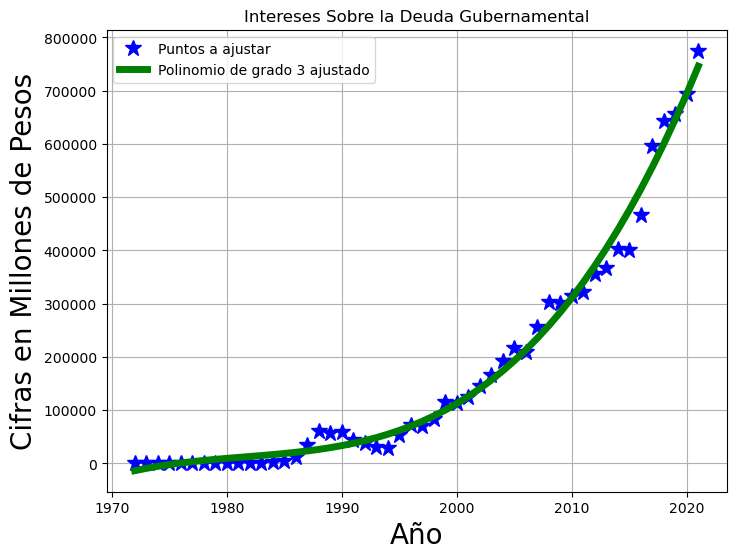

In [21]:
yhat3 = (beta3.dot([x_norm**i for i in range(n)]))*(max_y1 - min_y1) + min_y1  # Para volver a la escala inicial

# Graficar
plt.figure(figsize=(8,6))

#Agregar puntos y línea ajustada
plt.plot(x,y,'*b',ms = 12, label='Puntos a ajustar')
plt.plot(x,yhat3,'g',lw=5,label='Polinomio de grado 3 ajustado')

plt.title('Intereses Sobre la Deuda Gubernamental')
plt.xlabel('Año',fontsize = 20)
plt.ylabel('Cifras en Millones de Pesos',fontsize = 20)

plt.grid()
plt.legend(loc='best')
plt.show()

### 1.7 Conclusiones.
> Como podemos observar en la curva, la tendencia que tiene esta grafica es que esta creciendo de manera exponencial, esto puede ser por varios motivos pero uno de los principales es que el gobierno cada año aumenta su deuda para financiar nuevos proyectos, también otro de los factores es la inflación que aumenta año con año y también otro es que las tasas de interés estan subiendo y esto hace que sea más caro el financiamiento

> También como conclusión del trabajo es que no le habia encontrado algunas aplicaciones a esta materia pero poco a poco me voy dando cuenta que te puede ayudar en demasiados temas el saber programar, y creo que en mi carrera se verá demasiado la programación y con esto me doy cuenta que te ahorras demasiado tiempo en realizar tus trabajos

### 1.8 Referencias.
> World Bank Open Data. (s. f.). World Bank Open Data. https://data.worldbank.org/indicator/GC.XPN.INTP.CN?locations=MX&view=chart

## 2. Optimización de un Portafolio de Inversión con Programación Lineal

### 2.2 Objetivos.
> Encontrar y modelar las restricciones de una optimización de portafolio

> Encontrar la cantidad y proporción indicada para maximizar los rendimientos.

> Diversificar el portafolio restringiendo la inversión máxima por activo.


### 2.3 Introducción

>En este problema, se plantearán rendimientos reales de activos financieros en la forma de acciones que conforman el S&P 500, para así determinar utilizando programación lineal, cuales son las cantidades a invertir en cada activo para que podamos maximizar la inversión total del portafolio.

**Portafolio de Inversión**
>Un portafolio de inversión se refiere al conjunto de activos financieros en posesión de una persona, y generalmente se conforma por diversos tipos de activos. Se busca de manera puntual, que esta diversidad minimice el riesgo al mismo tiempo que maximiza las ganancias en forma de rendimientos.

**Diversificación**
>Uno de los elementos más importantes de un portafolio de inversión es la diversificación. Ya que se mantiene un riesgo constante en los activos financieros, 

### 2.4 Modelo que Representa el Problema

**Activos y Rendimientos Anuales:**

| Variable | Activo | Rendimiento Anual (%) |
|----------|--------|-----------------------|
| $x_1$    | VFC    | $-2.2032$              |
| $x_2$    | MSFT   | $62.496$               |
| $x_3$    | AMZN   | $5.076$               |
| $x_4$    | NVDA   | $113.148$              |
| $x_5$    | GOOGL  | $73.404$               |
| $x_6$    | BRK.B  | $39.384$               |
| $x_7$    | TSLA   | $52.272$               |
| $x_8$    | META   | $31.14$                |
| $x_9$    | XOM    | $49.14$                |
| $x_{10}$ | UNH    | $54.144$               |
| $x_{11}$ | ACN    | $68.04$                |
| $x_{12}$ | ADBE   | $22.164$               |
| $x_{13}$ | NKE    | $23.868$               |
| $x_{14}$ | RTX    | $31.044$               |
| $x_{15}$ | AMD    | $63.216$               |
| $x_{16}$ | NFLX   | $20.952$               |
| $x_{17}$ | QCOM   | $26.208$               |
| $x_{18}$ | HON    | $0.036$                |
| $x_{19}$ | T      | $-1.764$               |
| $x_{20}$ | AMGN   | $2.484$                |
| $x_{21}$ | INTC   | $28.764$               |
| $x_{22}$ | CTLT   | $49.32$                |
| $x_{23}$ | GS     | $-1.764$               |
| $x_{24}$ | MDT    | $3.204$                |
| $x_{25}$ | DE     | $5.544$                |
| $x_{26}$ | ELV    | $1.332$                |
| $x_{27}$ | GE     | $0.828$                |
| $x_{28}$ | IBM    | $0.828$                |
| $x_{29}$ | PYPL   | $-4.176$               |
| $x_{30}$ | AZO    | $8.244$                |
| $x_{31}$ | KLAC   | $6.948$                |
| $x_{32}$ | DG     | $0.18$                 |
| $x_{33}$ | PSX    | $0.612$                |
| $x_{34}$ | VLO    | $0.396$                |
| $x_{35}$ | ALGN   | $0.288$                |

Para obtener los rendimientos, se utilizaron los precios de cierre históricos de cada activo, proveidos por la función STOCKHISTORY() que se puede encontrar en el programa Excel. Se extrajeron datos de un periodo de un año, con los que se calculo el rendimiento diario promedio anual y luego se convirtió en el rendimiento porcentual anual.
                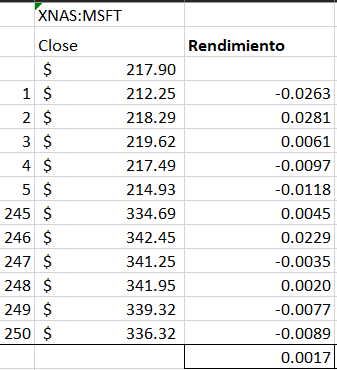
                   *Ejemplo de un cálculo de un rendimiento*

### Función Objetivo:
Maximizar: 

$-2.2032x_1 + 62.496x_2 + 5.076x_3 + 113.148x_4 + 73.404x_5 + 39.384x_6 + 52.272x_7 + 31.14x_8 + 49.14x_9 + 54.144x_{10} + 68.04x_{11} + 22.164x_{12} + 23.868x_{13} + 31.044x_{14} + 63.216x_{15} + 20.952x_{16} + 26.208x_{17} + 0.036x_{18} - 1.764x_{19} + 2.484x_{20} + 28.764x_{21} + 49.32x_{22} - 1.764x_{23} + 3.204x_{24} + 5.544x_{25} + 1.332x_{26} + 0.828x_{27} + 0.828x_{28} - 4.176x_{29} + 8.244x_{30} + 6.948x_{31} + 0.18x_{32} + 0.612x_{33} + 0.396x_{34} + 0.288x_{35}$

*La función objetivo toma cada uno de los rendimientos y los utiliza como coeficientes para las incógnitas, las cuales representan la cantidad a invertir de cada activo dado*

**Restricción de ajuste al total del Portafolio:**


$[x_1 + x_2 + ... + x_{34} + x_{35} = 1.0]$

*Esta restricción se refiere a que la suma del porcentaje invertido den cada acción debe ser igual a 1, es decir, al total del portafolio*

**Restricción de porcentaje de cada acción:** 
\begin{align*}
[x_1 &\leq 0.08] \\
[x_2 &\leq 0.08] \\
[x_.{... }&\leq 0.08] \\
[x_{34} &\leq 0.08] \\
[x_{35} &\leq 0.08] \\
\end{align*}

*La segunda restricción busca que no haya más de un 8% invertido en cada activo dado, con el objetivo de que se pueda diversificar el portafolio y no se inveirta únicamente en el mayor rendimiento*

### 2.5 Solución del Problema de Programación Lineal

In [1]:
from scipy.optimize import linprog
import numpy as np


r = np.array([-2.2032, 62.496, 5.076, 113.148, 73.404, 39.384, 52.272, 31.14, 49.14, 54.144, 68.04, 22.164, 23.868, 31.044, 63.216, 20.952, 26.208, 0.036, -1.764, 2.484, 28.764, 49.32, -1.764, 3.204, 5.544, 1.332, 0.828, 0.828, -4.176, 8.244, 6.948, 0.18, 0.612, 0.396, 0.288])

presupuesto_total = 10000

limite_inversion_por_activo = presupuesto_total * 0.08

num_activos = len(r)

coeficientes_objetivo = -r 

# Coeficientes de las restricciones de igualdad (inversión total igual al presupuesto)
coeficientes_restriccion_igualdad = np.ones(num_activos)
lado_derecho_restriccion_igualdad = presupuesto_total

# Coeficientes de las restricciones de desigualdad (inversión por activo <= 8% del presupuesto total)
coeficientes_restriccion_desigualdad = np.eye(num_activos)
lados_derechos_restricciones_desigualdad = limite_inversion_por_activo * np.ones(num_activos)

# Límites (BOUNDS) de las variables
limites_variables = [(0, None)] * num_activos

# Resolver el problema usando linprog
resultado = linprog(c=coeficientes_objetivo, A_eq=[coeficientes_restriccion_igualdad], b_eq=[lado_derecho_restriccion_igualdad], A_ub=coeficientes_restriccion_desigualdad, b_ub=lados_derechos_restricciones_desigualdad, bounds=limites_variables)

# Extraer los resultados
inversiones_optimas = resultado.x
rendimiento_optimo = -resultado.fun

resultado

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -560904.0
              x: [ 0.000e+00  8.000e+02 ...  0.000e+00  0.000e+00]
            nit: 1
          lower:  residual: [ 0.000e+00  8.000e+02 ...  0.000e+00
                              0.000e+00]
                 marginals: [ 3.097e+01  0.000e+00 ...  2.837e+01
                              2.848e+01]
          upper:  residual: [       inf        inf ...        inf
                                    inf]
                 marginals: [ 0.000e+00  0.000e+00 ...  0.000e+00
                              0.000e+00]
          eqlin:  residual: [ 0.000e+00]
                 marginals: [-2.876e+01]
        ineqlin:  residual: [ 8.000e+02  0.000e+00 ...  8.000e+02
                              8.000e+02]
                 marginals: [-0.000e+00 -3.373e+01 ... -0.000e+00
                             -0.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
 

In [6]:
inversiones_optimas = resultado.x
rendimiento_optimo = -resultado.fun

print("Inversiones óptimas por activo:")
for i in range(num_activos):
    print(f"Activo {i+1}: {inversiones_optimas[i]:.2f} USD")

print(f"Rendimiento óptimo esperado: {rendimiento_optimo:.6f} USD")

Inversiones óptimas por activo:
Activo 1: 0.00 USD
Activo 2: 800.00 USD
Activo 3: 0.00 USD
Activo 4: 800.00 USD
Activo 5: 800.00 USD
Activo 6: 800.00 USD
Activo 7: 800.00 USD
Activo 8: 800.00 USD
Activo 9: 800.00 USD
Activo 10: 800.00 USD
Activo 11: 800.00 USD
Activo 12: 0.00 USD
Activo 13: 0.00 USD
Activo 14: 800.00 USD
Activo 15: 800.00 USD
Activo 16: 0.00 USD
Activo 17: 0.00 USD
Activo 18: 0.00 USD
Activo 19: 0.00 USD
Activo 20: 0.00 USD
Activo 21: 400.00 USD
Activo 22: 800.00 USD
Activo 23: 0.00 USD
Activo 24: 0.00 USD
Activo 25: 0.00 USD
Activo 26: 0.00 USD
Activo 27: 0.00 USD
Activo 28: 0.00 USD
Activo 29: 0.00 USD
Activo 30: 0.00 USD
Activo 31: 0.00 USD
Activo 32: 0.00 USD
Activo 33: 0.00 USD
Activo 34: 0.00 USD
Activo 35: 0.00 USD
Rendimiento óptimo esperado: 560904.000000 USD


### 2.6 Visualización del Problema

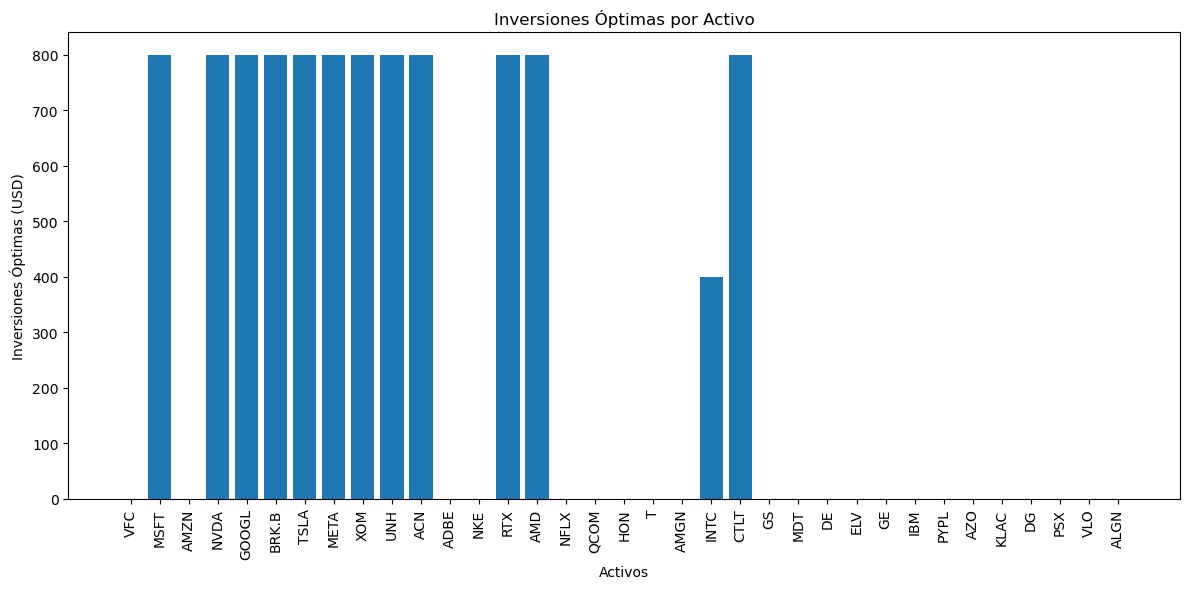

In [5]:
import matplotlib.pyplot as plt

activos = [
    "VFC", "MSFT", "AMZN", "NVDA", "GOOGL",
    "BRK.B", "TSLA", "META", "XOM", "UNH",
    "ACN", "ADBE", "NKE", "RTX", "AMD",
    "NFLX", "QCOM", "HON", "T", "AMGN",
    "INTC", "CTLT", "GS", "MDT", "DE",
    "ELV", "GE", "IBM", "PYPL", "AZO",
    "KLAC", "DG", "PSX", "VLO", "ALGN"
]

inversiones_optimas = [
    0.00, 800.00, 0.00, 800.00, 800.00, 800.00, 800.00, 800.00, 800.00, 800.00,
    800.00, 0.00, 0.00, 800.00, 800.00, 0.00, 0.00, 0.00, 0.00, 0.00,
    400.00, 800.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,
    0.00, 0.00, 0.00, 0.00, 0.00
]


activos = activos[:35]
inversiones_optimas = inversiones_optimas[:35]

plt.figure(figsize=(12, 6))
plt.bar(activos, inversiones_optimas)
plt.xlabel("Activos")
plt.ylabel("Inversiones Óptimas (USD)")
plt.title("Inversiones Óptimas por Activo")
plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mayor legibilidad

plt.tight_layout()
plt.show()

### 2.7 Conclusiones
> El programa y el modelo son útiles y cumplen su función de manera adecuada, ya que podemos observar que el rendimiento que obtenemos es el máximo de cualquier combinación posible de activos, además de que podemos en cualquier momento modificar las condiciones para permitir más o menos porcentaje del portafolio en cada activo dado.

> Sin embargo, esto lleva a las ventajas y desventajas de este modelo en particular, siendo la mayor ventaja que es eficiente en seleccionar los activos con mayor rendimiento e ir eligiendo las opciones más beneficiosas en el sentido de maximizar los rendimientos. La principal desventaja es que el único grado de selección que se ejecuta, tiene que ver con el rendimiento y no necesariamente toma en cuenta otros factores como el tipo de industria en el que radica la empresa de la acción o el posible riesgo dentro de esos rendimientos. 

> El modelo lleva a una solución factible bajo las condiciones predispuestas. Aún así el mayor área de oportunidad radica en ampliar las restricciones encontrando una manera de ponderar cada acción de acuerdo a otros factores como el riesgo.

### 2.8 Referencias
>Chikara, A. (2021, February 28). Linear Programming/optimization in finance using Python. Medium. https://medium.com/analytics-vidhya/linear-programming-optimization-in-finance-using-python-8d1e04b5815 